# Testing different classification methods and calculating their accuracy

### Using the Breast Cancer diagnosis dataset from scikit learn

In [5]:
from sklearn import datasets

In [6]:
data = datasets.load_breast_cancer()


In [7]:
#Dataset Description

In [8]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
import pandas as pd

df = pd.read_csv('data.csv', delimiter=',', header=0)

In [15]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [17]:
# Convert strings -> dummies integers
d = {'M': 0, 'B': 1}

# Define Y feature and labels
y = data['diagnosis'].map(d)

In [19]:
# Define X feature and labels
X = data.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


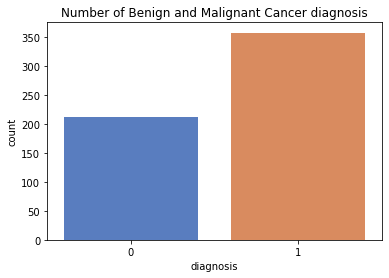

In [27]:
# Plot number of M - malignant and B - benign cancer

ax = sns.countplot(y, label="No. Diagnosis", palette="muted")
B, M = y.value_counts()
plt.title('Number of Benign and Malignant Cancer diagnosis')
plt.savefig('count_diagnosis.png')

In [24]:
print('Number of benign cancer: ', B)
print('Number of malignant cancer: ', M)

Number of benign cancer:  357
Number of malignant cancer:  212


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Split dataset into training (80%) and test (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize data
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_train.mean())/(X_test.max()-X_test.min())

In [31]:
X_train_N

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,-0.192271,-0.067339,-0.189401,-0.145501,0.046559,-0.102934,-0.146145,-0.153777,0.040712,0.013521,...,-0.181291,0.034682,-0.174567,-0.122196,0.051118,-0.108335,-0.129386,-0.170367,-0.002003,-0.044939
427,-0.156775,0.117308,-0.159134,-0.124674,-0.091271,-0.157142,-0.120301,-0.172217,0.104348,-0.061037,...,-0.124372,0.173274,-0.116248,-0.096267,-0.014259,-0.079811,-0.059737,-0.136403,0.011993,-0.045070
406,0.095958,-0.178128,0.086253,0.062007,-0.015894,-0.062697,-0.076112,-0.016948,-0.037571,-0.082519,...,0.051722,-0.158815,0.044169,0.016396,-0.078315,-0.077288,-0.029146,-0.005331,-0.024869,-0.087705
96,-0.091462,-0.054476,-0.096941,-0.085989,0.087832,-0.112145,-0.146637,-0.095825,0.045762,0.077548,...,-0.121882,-0.123101,-0.123967,-0.094866,-0.121899,-0.153566,-0.173875,-0.191621,-0.133483,-0.063829
490,-0.088149,0.136395,-0.094246,-0.079457,-0.157417,-0.175737,-0.164818,-0.179324,-0.134036,-0.061247,...,-0.074212,0.171942,-0.071176,-0.063481,-0.045296,-0.069333,-0.115408,-0.176017,0.038604,-0.009586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.222325,0.034320,0.200965,0.190109,-0.078020,-0.152314,-0.017068,0.048409,-0.131006,-0.267650,...,0.131765,-0.033016,0.109411,0.087203,-0.053881,-0.131814,-0.037134,0.051506,-0.066462,-0.171333
9,-0.078210,0.202785,-0.054235,-0.075469,0.240976,0.466685,0.327590,0.182604,0.111419,0.416217,...,-0.041483,0.403552,-0.046722,-0.041730,0.348945,0.782119,0.668937,0.367042,0.288161,0.813384
359,-0.221331,-0.034559,-0.221120,-0.159160,0.048731,-0.149848,-0.141482,-0.172117,-0.153228,0.145787,...,-0.150697,-0.013826,-0.155592,-0.108531,0.005552,-0.142583,-0.122277,-0.220212,-0.088737,-0.013980
192,-0.207890,-0.038709,-0.214832,-0.155130,-0.292314,-0.273538,-0.204978,-0.241998,-0.078985,0.037952,...,-0.223696,-0.125500,-0.223026,-0.141907,-0.404736,-0.217881,-0.213651,-0.394239,-0.196168,-0.117417


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import Pipeline
#from keras.layers import Activation
#from keras.layers import Dense
#from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn import tree
#import graphviz

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]


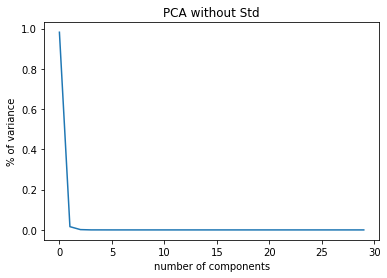

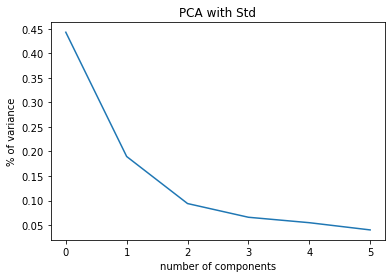

In [37]:

# PCA without std
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('% of variance')
plt.title('PCA without Std')
plt.savefig('pcavariancewithoutstd.png')

# PCA with std
pca = PCA(n_components=6)
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)
print(pca.explained_variance_ratio_)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('% of variance')
plt.title('PCA with Std')
#plt.savefig('Plots/pcavariancewithstd.png')

###### SVM ######

svc = svm.SVC(kernel='linear', C=1)

# Pipeline
model = Pipeline([
    ('reduce_dim', pca),
    ('svc', svc)
])


In [38]:
model.fit(X_train_N, y_train)
svm_score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("SVM accuracy: %0.2f (+/- %0.2f)" % (svm_score.mean(), svm_score.std() * 2))

SVM accuracy: 0.94 (+/- 0.06)


In [39]:
###### K-Nearest Neighbors ######

def KnearestNeighbors():
    """
    Function for compute accuracy using K-NN algorithm
    :return: k-NN score
    """
    for i in range(1, 5):
        knn = KNeighborsClassifier(n_neighbors=i)
        knnp = Pipeline([
            ('reduce_dim', pca),
            ('knn', knn)
        ])
        k_score = cross_val_score(knnp, X, y, cv=10, scoring="accuracy")
        print("KNN accuracy: %0.2f (+/- %0.2f)" % (k_score.mean(), k_score.std() * 2))
KnearestNeighbors()

KNN accuracy: 0.91 (+/- 0.05)
KNN accuracy: 0.91 (+/- 0.03)
KNN accuracy: 0.92 (+/- 0.06)
KNN accuracy: 0.92 (+/- 0.06)


In [40]:
###### Decision Trees ######

trees = tree.DecisionTreeClassifier()
treeclf = trees.fit(X_train_N, y_train)
treep = Pipeline([
    ('reduce_dim', pca),
    ('trees', trees)
    ])
score_trees = cross_val_score(treep, X, y, cv=10)
print("Decision Tree accuracy: %0.2f (+/- %0.2f)" % (score_trees.mean(), score_trees.std() * 2))


Decision Tree accuracy: 0.94 (+/- 0.05)


In [43]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [44]:
!pip install -U graphviz

     |████████████████████████████████| 46 kB 4.3 MB/s  eta 0:00:01


In [46]:
import graphviz